In [62]:

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
env = gym.make('FrozenLake-v0')

[2017-04-25 03:02:43,561] Making new env: FrozenLake-v0


In [64]:
tf.reset_default_graph()

### Architektúra

In [65]:

# 1x16 méretű input vektor
# 16x4 db súly, az inputot 4 outputra képzi le, random inicializálva [0,0.1] intervallumon
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))

# Forwardd step
Qout = tf.matmul(inputs1,W)
# maximális értékű action kiválasztása
predict = tf.argmax(Qout,1)


### Hiba és paraméterezés

In [66]:

# nextQ a következő kapott érték
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
# veszteségünk a négyzetes hibaösszeg, ezt minimalizáljuk grad. desc-el
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

## Tanítás

In [92]:
init = tf.global_variables_initializer()
# leszámolási tényező
y = .99
# Epszilon-mohó kezdeti epszilonja
e = 0.1
num_episodes = 20
lepesList = []
jutalomList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # minden epizód a kezdeti környezetről kezd
        s = env.reset()
        
        osszJutalom = 0
        
        vege = False
        lepeshossz = 0
        #The Q-Network
        while lepeshossz < 99:
            lepeshossz+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,vege,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            osszJutalom += r
            s = s1
            if vege == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        lepesList.append(lepeshossz)
        jutalomList.append(osszJutalom)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.1%


In [98]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

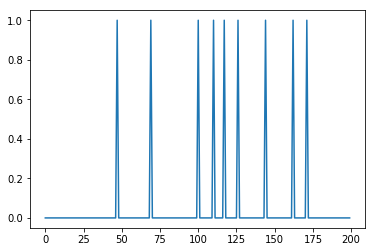

In [85]:
plt.plot(rList)

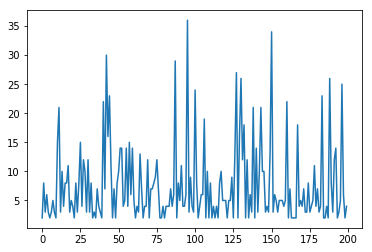

In [86]:

plt.plot(jList)